# **LINEAR vs POLYNOMIAL**

## Import ve Data

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
df = pd.read_csv("Advertising.csv")

In [224]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


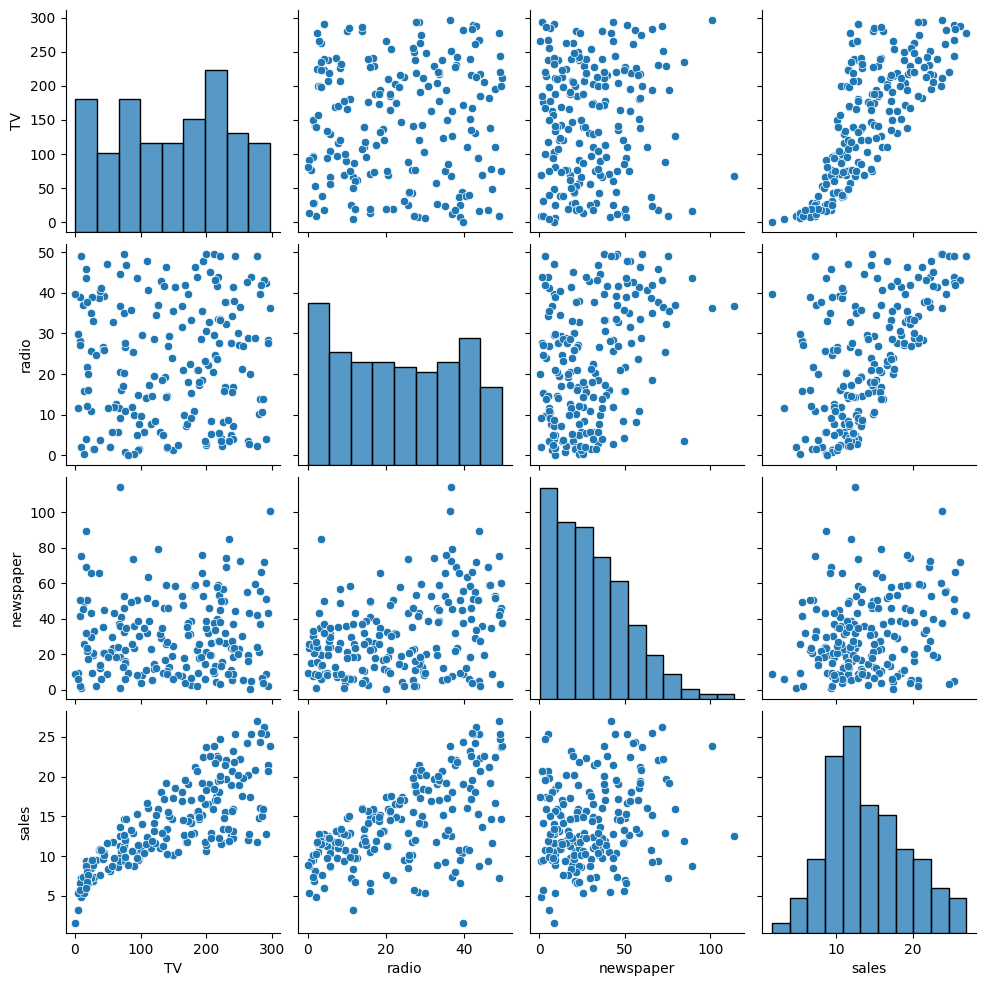

In [225]:
sns.pairplot(data=df)

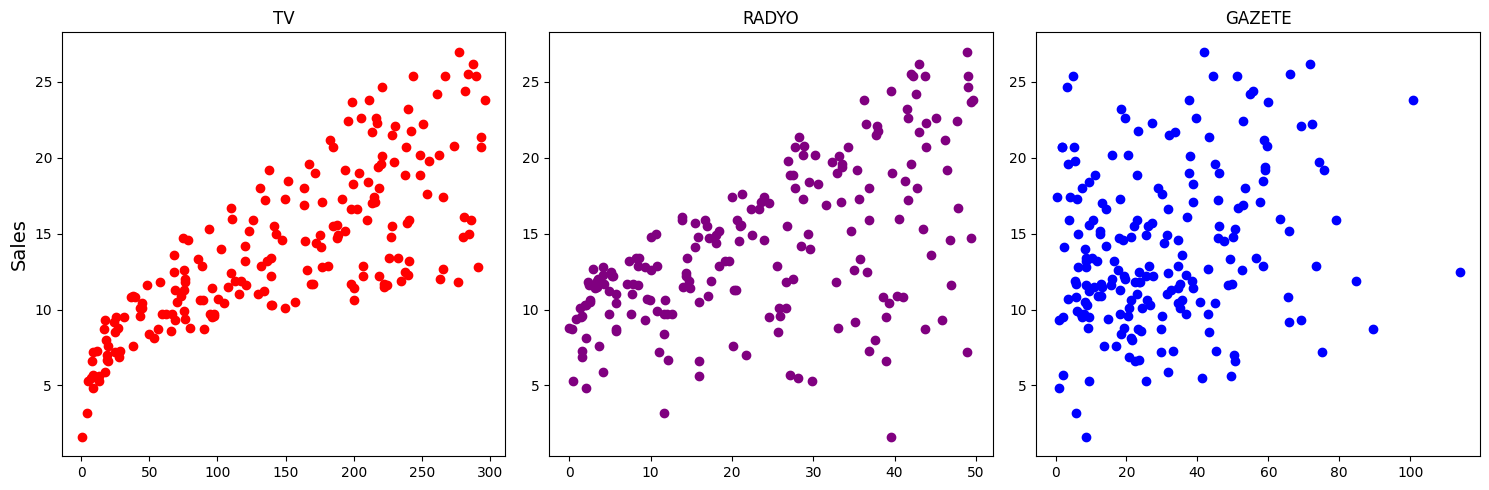

In [226]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(df["TV"], df["sales"], "o", color="red")
ax[0].set_ylabel("Sales", size=14)
ax[0].set_title("TV")

ax[1].plot(df["radio"], df["sales"], "o", color="purple")
ax[1].set_title("RADYO")

ax[2].plot(df["newspaper"], df["sales"], "o", color="blue")
ax[2].set_title("GAZETE")

plt.tight_layout()

___
___

## np.polyfit

In [227]:
X = df["TV"]
y = df["sales"]

In [228]:
harcama = np.linspace(0,300,100)

### 1. deg

In [229]:
np.polyfit(X,y,1)

array([0.04753664, 7.03259355])

In [230]:
satis = 0.04753664 * harcama + 7.03259355

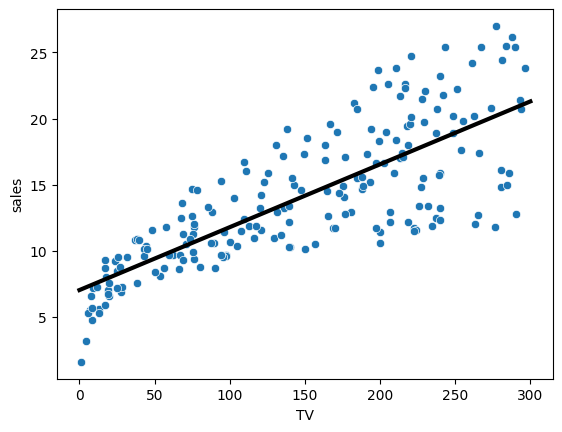

In [231]:
sns.scatterplot(data = df, x="TV", y="sales")
plt.plot(harcama, satis, c="black", lw=3)

### 2. deg

In [232]:
np.polyfit(X,y,2)

array([-6.84693373e-05,  6.72659270e-02,  6.11412013e+00])

In [233]:
satis = -6.84693373e-05 * harcama**2 + 6.72659270e-02 * harcama + 6.11412013

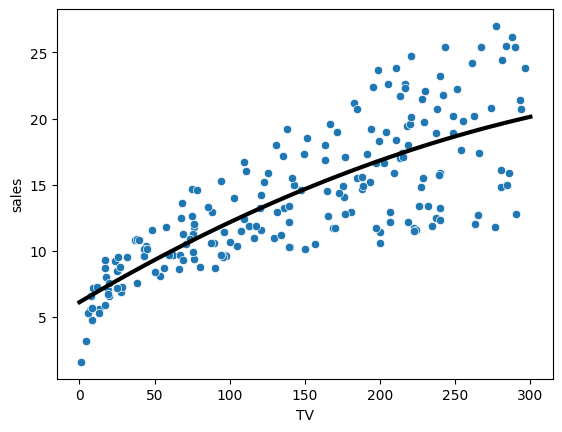

In [234]:
sns.scatterplot(data = df, x="TV", y="sales")
plt.plot(harcama, satis, c="black", lw=3)

### 3. deg

In [235]:
np.polyfit(X,y,3)

array([ 5.57199796e-07, -3.15222433e-04,  9.64341770e-02,  5.42010655e+00])

In [236]:
satis = 5.57199796e-07 * harcama**3 + -3.15222433e-04 * harcama**2 + 9.64341770e-02 * harcama + 5.42010655

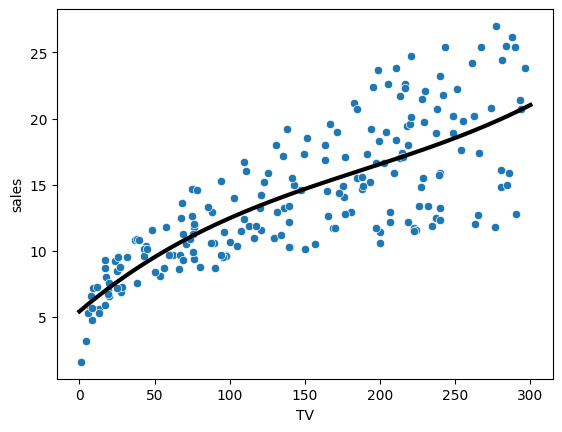

In [237]:
sns.scatterplot(data = df, x="TV", y="sales")
plt.plot(harcama, satis, c="black", lw=3)

### Birden Fazla Değişkenle np.polyfit

In [238]:
X = df[['TV','radio','newspaper']]
y = df['sales']

In [239]:
# np.polyfit(X,y,3)

1 boyutlu girdi istiyor. Yani aynı anda 3 sütundaki verileri işleyemiyor.

___
___

## Veri Hazırlama

In [240]:
X = df.drop("sales", axis=1)
y = df["sales"]

___
___

## Train Test Split

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

___
___

## Linear Model

In [243]:
from sklearn.linear_model import LinearRegression

In [244]:
model_lin = LinearRegression()

In [245]:
model_lin.fit(X_train, y_train)

LinearRegression()

In [246]:
pred_lin = model_lin.predict(X_test)

In [247]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [248]:
MAE = mean_absolute_error(y_test, pred_lin)
RMSE = np.sqrt(mean_squared_error(y_test, pred_lin))

In [249]:
print("MAE : ", MAE)
print("RMSE :", RMSE)

MAE :  1.184391880204893
RMSE : 1.4355426289443451


In [250]:
res_lin = y_test - pred_lin

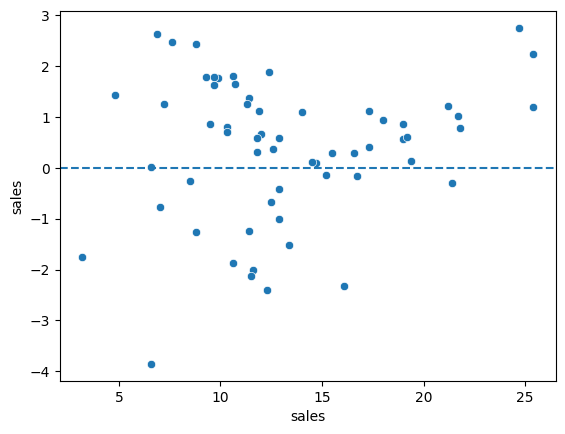

In [251]:
sns.scatterplot(x= y_test, y= res_lin)
plt.axhline(y= 0, ls= "--")

<AxesSubplot:xlabel='sales', ylabel='Count'>

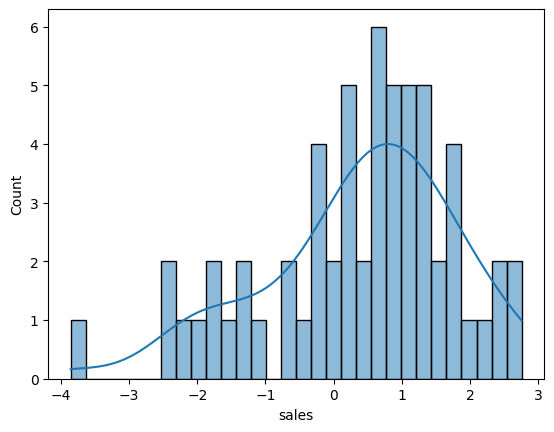

In [252]:
sns.histplot(res_lin, bins=30, kde=True)

## Son Model

In [253]:
final_lin = LinearRegression()

In [254]:
final_lin.fit(X,y)

LinearRegression()

In [255]:
y_hat = final_lin.predict(X)

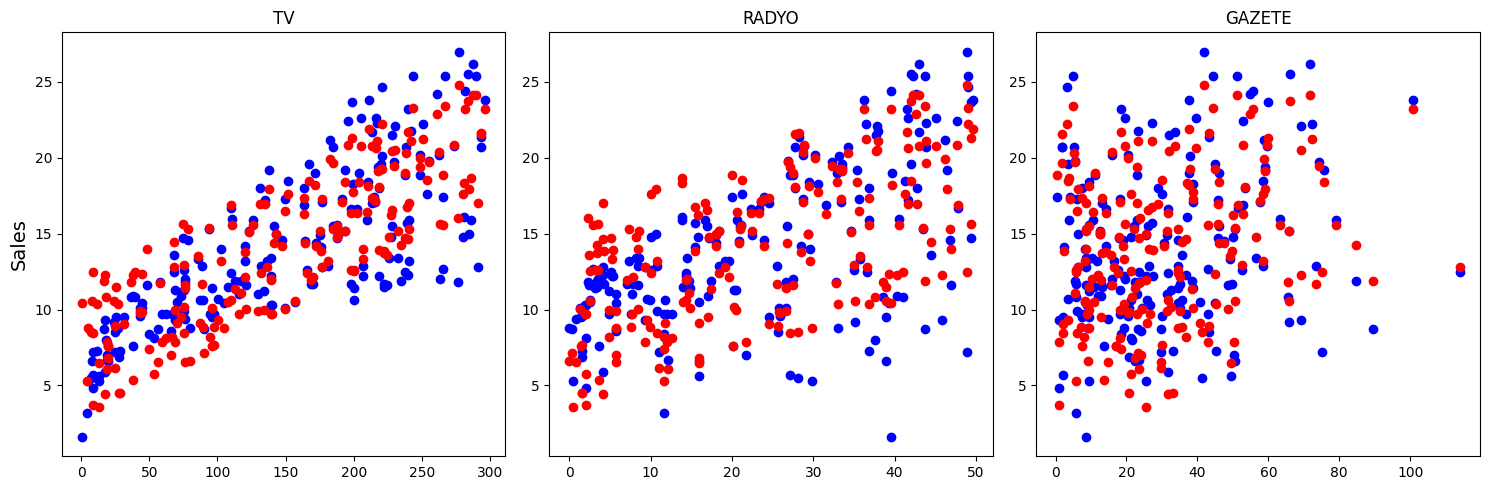

In [256]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(df["TV"], df["sales"], "o", color="blue")
ax[0].plot(df["TV"], y_hat, "o", color="red")
ax[0].set_ylabel("Sales", size=14)
ax[0].set_title("TV")

ax[1].plot(df["radio"], df["sales"], "o", color="blue")
ax[1].plot(df["radio"], y_hat, "o", color="red")
ax[1].set_title("RADYO")

ax[2].plot(df["newspaper"], df["sales"], "o", color="blue")
ax[2].plot(df["newspaper"], y_hat, "o", color="red")
ax[2].set_title("GAZETE")

plt.tight_layout()

___
___

## Poly Model

In [257]:
from sklearn.preprocessing import PolynomialFeatures

In [258]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)

In [259]:
poly_feat = poly_conv.fit_transform(X)

In [260]:
poly_feat

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [261]:
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=99)

In [262]:
model_poly = LinearRegression(fit_intercept=True)

In [263]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [264]:
pred_poly = model_poly.predict(X_test)

In [265]:
MAE_2 = mean_absolute_error(y_test, pred_poly)
RMSE_2 = np.sqrt(mean_squared_error(y_test, pred_poly))

#### Polynomial Regression

In [266]:
print("MAE : ", MAE_2)
print("RMSE :", RMSE_2)

MAE :  0.4678054953837959
RMSE : 0.6106500340084705


#### Linear Regression

In [267]:
print("MAE : ", MAE)
print("RMSE :", RMSE)

MAE :  1.184391880204893
RMSE : 1.4355426289443451


___
___

## Poly Regr İçin En İyi Derece

In [268]:
train_rmse = []
test_rmse = []

for d in range(1,10):
    
    poly_conv = PolynomialFeatures(degree=d, include_bias=False)
    poly_feat = poly_conv.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=99)
    
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse.append(train_RMSE)
    test_rmse.append(test_RMSE)

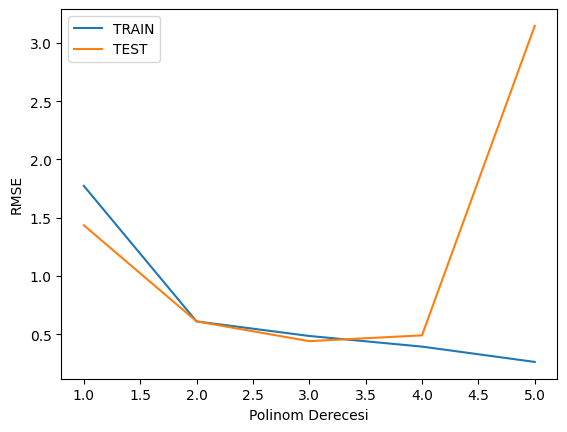

In [269]:
plt.plot(range(1,6),train_rmse[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse[:5],label='TEST')
plt.xlabel("Polinom Derecesi")
plt.ylabel("RMSE")
plt.legend()

___
___

# **https://www.youtube.com/watch?v=_Kmh4BbJPz8**